In [47]:
# !pip install 'gym[box2d]'
# !apt-get install python-opengl -y
# !apt install xvfb -y
# !pip install pyvirtualdisplay
# !pip install https://github.com/pyglet/pyglet/archive/pyglet-1.5-maintenance.zip
# !apt-get install ffmpeg -y

In [48]:
# env.render() gives error in Colab
# below code solves display error
# https://github.com/openai/gym/issues/1898


from pyvirtualdisplay import Display
display = Display(visible=0,size=(600,600))
display.start()

In [49]:
import numpy as np
import matplotlib.pyplot as plt

from maze_env import Maze
from utils import plot_policy, plot_values, test_agent,plot_action_values

np.random.seed(12345)

In [50]:
# initialze the env
env = Maze()

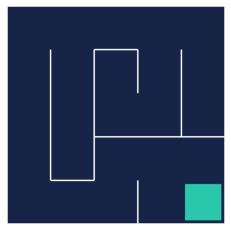

In [51]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)

In [52]:
# intialize action value table Q(s,a)
action_values = np.zeros((5,5,4))

In [53]:
#  define policy
def policy(state,epsilon=0.2):
    if np.random.random() < epsilon:
        return np.random.choice(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av==av.max()))

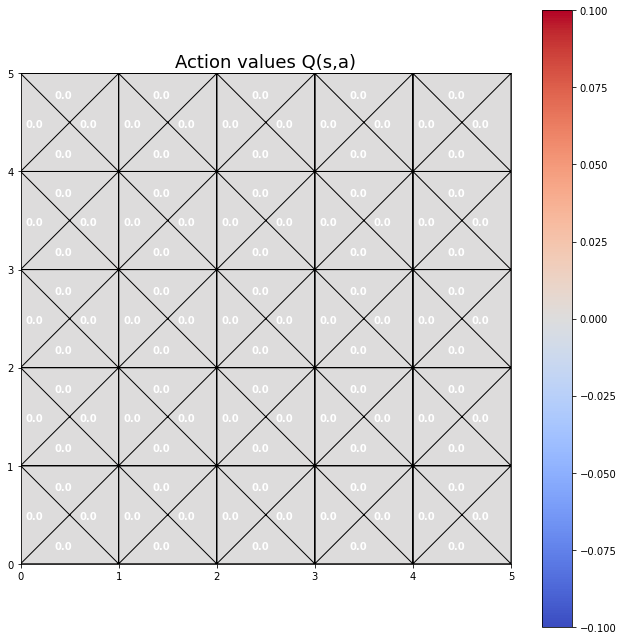

In [54]:
# plot action value
plot_action_values(action_values)

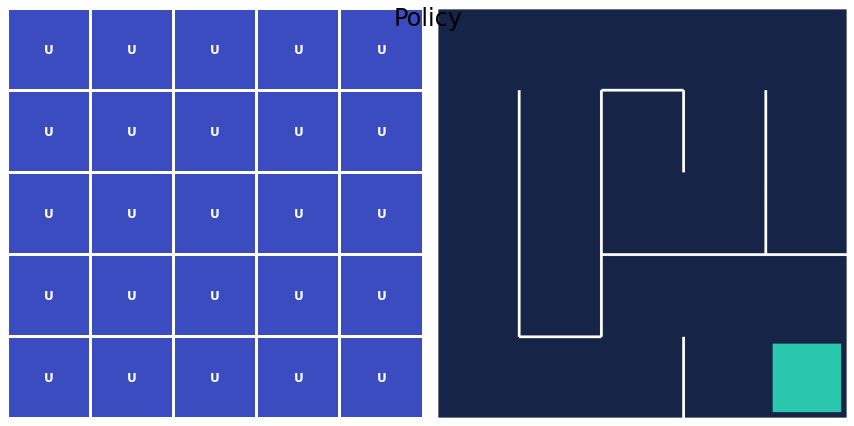

In [55]:
plot_policy(action_values,frame)

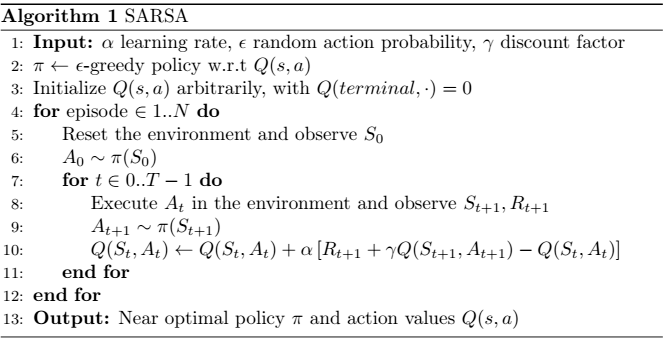

In [56]:
def sarsa(action_values, policy, episodes, alpha=0.1, gamma=0.99, epsilon=0.2):
    
    for episode in range(1, episodes+1):
        print(f"\rRunning episode {episode}/{episodes}...",end="")
        state = env.reset()
        action = policy(state,epsilon)
        done = False
        
        while not done:
            next_state, reward, done, _ = env.step(action)
            next_action = policy(next_state,epsilon)

            qsa = action_values[state][action]
            next_qsa = action_values[next_state][next_action]
            action_values[state][action] = qsa + alpha * (reward + gamma * next_qsa - qsa)
            state = next_state
            action = next_action

In [57]:
sarsa(action_values,policy,10000)

Running episode 10000/10000...

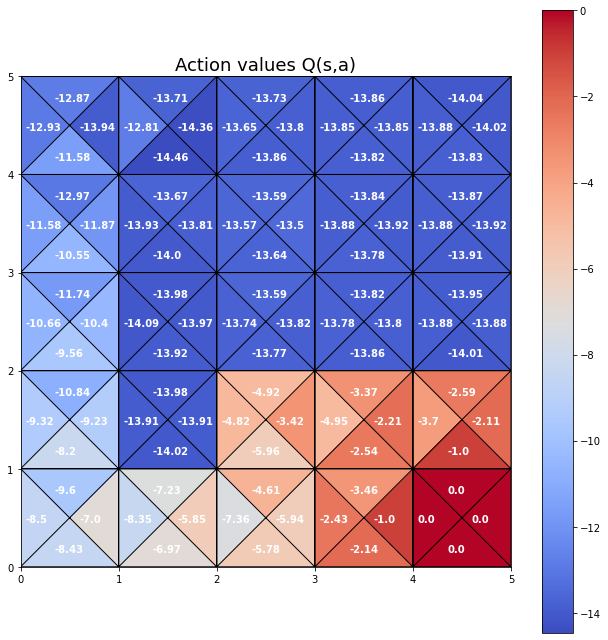

In [58]:
plot_action_values(action_values)

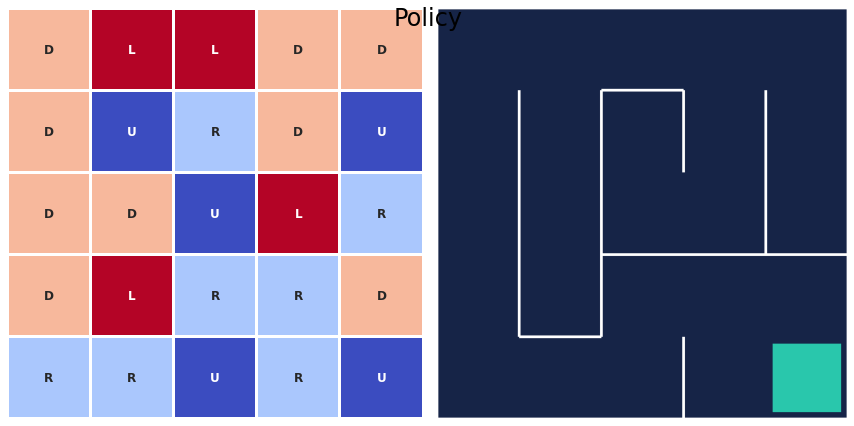

In [59]:
plot_policy(action_values,frame)

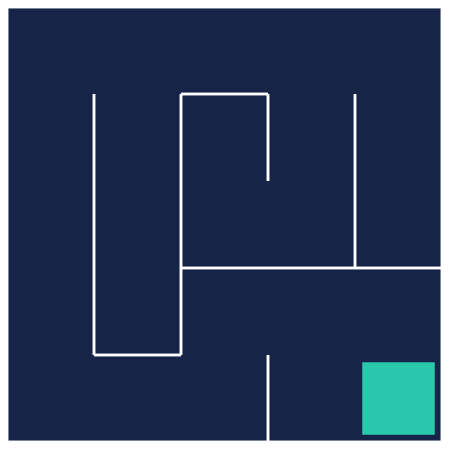

In [60]:
test_agent(env,policy, episodes=1)